<a href="https://colab.research.google.com/github/MohamedWL/AIProjects/blob/main/HomeTeamApplication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJET 1 
#Prédiction d'issue d'un match de football pour l'équipe à domicile
# Étudiant 1: Mohamed Labzagui, 300061799
# Étudiant 2: Mohamed Reda Ben Taleb, 300043376

# Notre etude empirique
### 1. a) Notre projet sera une classification binaire. On veut repartir les membres de notre ensemble en deux groupes disjoints, "victoire ou non-victoire". 
### 1. b) Le but de ce projet est d'apprendre à la machine les résultats de rencontre de foot d'équipes seniors masculines, voir si l'équipe à domicile (que l'on nommera team_A) a gagné ou non dans leurs rencontres. On n'y pense pas vraiment maintenant, mais ce notebook si plus poussé pourrait aussi permettre d'ouvrir la porte sur le monde du pari. (parier sur le nombre de buts potentiel sur un match etc...)

In [ ]:
#Importing required packages.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

On importe notre dataset.

In [ ]:
url = "https://raw.githubusercontent.com/MohamedWL/AIProjects/main/international_matches.csv"
matches=pd.read_csv(url)


On a une liste de tout nos attributs (leurs types, s'ils peuvent prendre une valeur nulle). On verra plus tard que certains ne seront pas utiles.

In [ ]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           23921 non-null  object 
 1   home_team                      23921 non-null  object 
 2   away_team                      23921 non-null  object 
 3   home_team_continent            23921 non-null  object 
 4   away_team_continent            23921 non-null  object 
 5   home_team_fifa_rank            23921 non-null  int64  
 6   away_team_fifa_rank            23921 non-null  int64  
 7   home_team_total_fifa_points    23921 non-null  int64  
 8   away_team_total_fifa_points    23921 non-null  int64  
 9   home_team_score                23921 non-null  int64  
 10  away_team_score                23921 non-null  int64  
 11  tournament                     23921 non-null  object 
 12  city                           23921 non-null 

On peut voir à quoi notre ensemble ressemble. head() peut prendre un paramètre pour spécifier combien de lignes, on veut voir (en partant de la première). La limite du paramètre est 100. tail() fait la même chose, mais en partant de la dernière ligne de notre ensemble.

In [ ]:
matches.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### describe() donne des valeurs descriptives, la moyenne des attributs numériques, médiane, les quartiles, etc... On fera une analyse plus poussée pour notre partie 2. a)

In [ ]:
matches.describe()

,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
count,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,8379.000000,8095.000000,7787.000000,8510.000000,8162.000000,7564.000000,8312.000000,7979.000000
mean,77.854688,80.797375,323.401488,315.453576,1.609214,1.068266,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143
std,52.355225,53.232902,500.825725,490.944273,1.630127,1.263944,8.212242,8.225919,6.003114,6.268416,6.053110,5.937425,6.201906,6.124573
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,47.000000,47.000000,52.800000,53.300000,54.200000,52.800000,53.300000,54.200000
25%,33.000000,36.000000,0.000000,0.000000,0.000000,0.000000,70.000000,69.000000,71.000000,71.700000,72.500000,70.500000,71.300000,71.800000
50%,71.000000,73.000000,0.000000,0.000000,1.000000,1.000000,75.000000,74.000000,75.200000,75.700000,76.200000,74.500000,75.300000,75.500000
75%,115.000000,119.000000,547.000000,523.000000,2.000000,2.000000,81.000000,80.000000,78.800000,80.000000,79.500000,78.200000,79.700000,79.000000
max,211.000000,211.000000,2164.000000,2164.000000,31.000000,21.000000,97.000000,97.000000,91.800000,93.000000,93.200000,91.800000,93.000000,93.200000


## 3) a. 
### - En executant tail() sur notre dataset on voit que l'on a 23 000 lignes (à peu près) ce qui semble assez énorme. Notre ensemble de données contient l'historique des matchs depuis 1993. On a décidé de se limiter aux matchs qui se sont déroulés depuis la coupe du monde 2010 car une vaste majorité des joueurs ayant joué avant cette date, on prit leurs retraites (Voir bloc [6]). La majorité des données supprimées le seront en majorité à cause de notre connaissance en foot.

In [ ]:
matches = matches.drop(labels=range(0, 13165), axis=0)

In [ ]:
matches.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
13165,2010-06-11,South Africa,Mexico,Africa,North America,83,17,0,0,1,...,No,Draw,71.0,79.0,72.2,72.0,75.2,76.5,77.7,76.8
13166,2010-06-11,Uruguay,France,South America,Europe,16,9,0,0,0,...,No,Draw,76.0,86.0,78.0,83.0,77.5,84.0,83.3,84.5
13167,2010-06-12,Argentina,Nigeria,South America,Africa,7,21,0,0,1,...,No,Win,78.0,NaN,82.5,87.3,83.8,75.5,79.0,75.2
13168,2010-06-12,England,USA,Europe,North America,8,14,0,0,1,...,No,Draw,81.0,82.0,85.2,85.0,85.8,73.8,73.7,78.2
13169,2010-06-12,Korea Republic,Greece,Asia,Europe,47,13,0,0,2,...,No,Win,73.0,79.0,71.2,71.3,73.8,76.0,78.0,78.5


# 2. Analyse du jeu de données

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


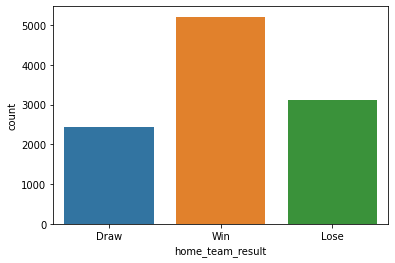

In [ ]:
sns.countplot(matches['home_team_result'])

Comme on voit ci-dessus l'équipe à domicile a plus de chance de gagner un match que de faire match nul ou de perdre.

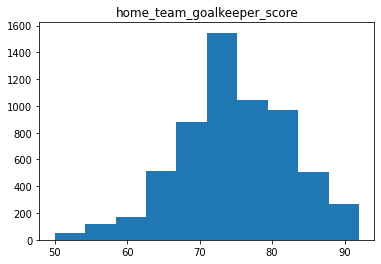

-------------------------------------------


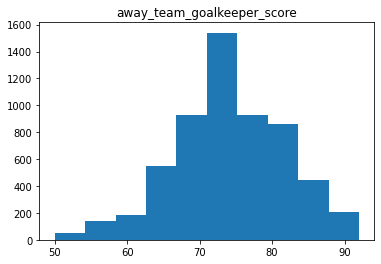

-------------------------------------------


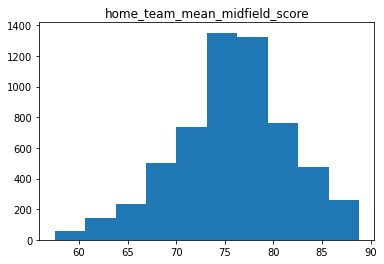

-------------------------------------------


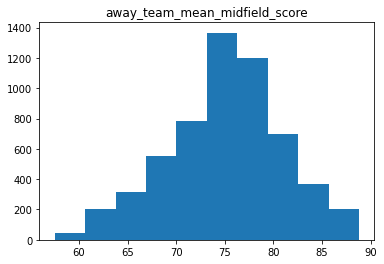

-------------------------------------------


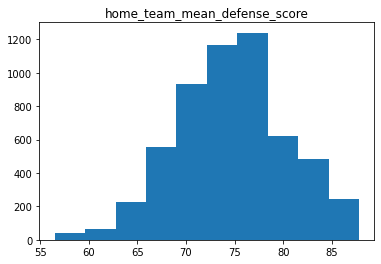

-------------------------------------------


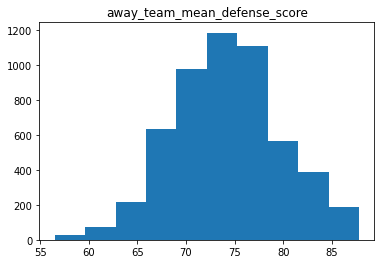

-------------------------------------------


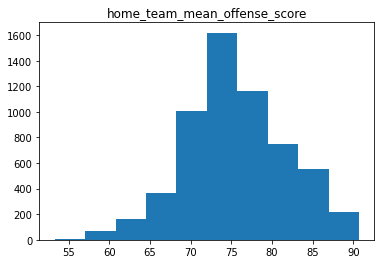

-------------------------------------------


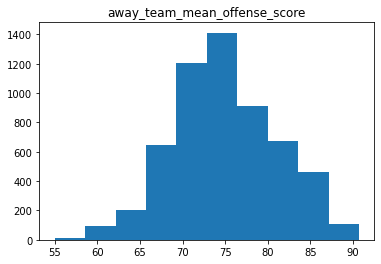

-------------------------------------------


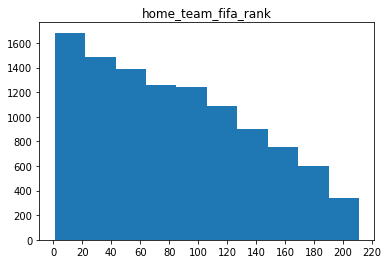

-------------------------------------------


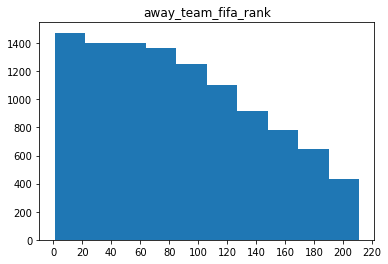

-------------------------------------------


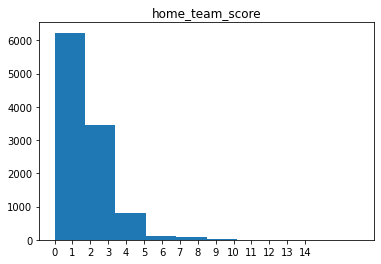

-------------------------------------------


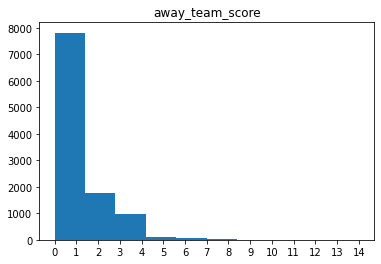

-------------------------------------------


In [ ]:
arr_num = matches[['home_team_goalkeeper_score','away_team_goalkeeper_score','home_team_mean_midfield_score','away_team_mean_midfield_score','home_team_mean_defense_score','away_team_mean_defense_score','home_team_mean_offense_score','away_team_mean_offense_score']]
arr_num_rank = matches[['home_team_fifa_rank','away_team_fifa_rank']]
arr_num_game_score = matches[['home_team_score','away_team_score']]
arr_cat = matches[['home_team_continent','away_team_continent','home_team_result']]


for i in arr_num.columns:
    plt.hist(arr_num[i])
    plt.title(i)
    plt.show()
    print("-------------------------------------------")


x = np.random.randint(low=0, high=50, size=230)
for i in arr_num_rank.columns:
    plt.hist(arr_num_rank[i])
    plt.title(i)
    plt.xticks(np.arange(0, len(x)+1, 20))
    plt.show()
    print("-------------------------------------------")


for i in arr_num_game_score.columns:
    plt.hist(arr_num_game_score[i])
    plt.title(i)
    plt.xticks(np.arange(0, 15, 1))
    plt.show()
    print("-------------------------------------------")

### - Ci-dessus, on voit la répartition des forces des gardiens, défenseurs, milieux et attaquants des équipes à domicile et à l'extérieur, bien que ces répartitions sont très similaires, on voit que le nombre de scores supérieurs sont supérieurs pour une équipe à domicile qu'à l'extérieur.

### - On voit aussi que l'équipe à domicile marque 0/1 buts moins de fois que l'équipe à l'extérieur, mais plus de fois 2 buts et plus que l'équipe à l'extérieur ce qui rejoint notre premier graphe qui montre que l'équipe à domicile gagne plus qu'elle perd.


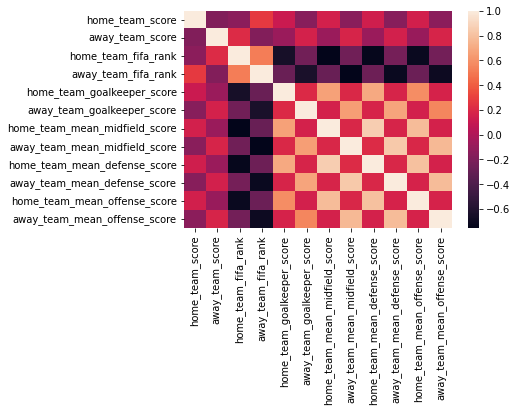

In [ ]:
arr = matches[['home_team_score','away_team_score','home_team_fifa_rank','away_team_fifa_rank','home_team_goalkeeper_score','away_team_goalkeeper_score','home_team_mean_midfield_score','away_team_mean_midfield_score','home_team_mean_defense_score','away_team_mean_defense_score','home_team_mean_offense_score','away_team_mean_offense_score']]
sns.heatmap(arr.corr())

## Correlation:
#### Nous n'avons pas encore modifié quoi que ce soit. Ceci est une observation préliminaire des corrélations de nos attributs numériques.

#### - On voit qu'il y a une corrélation entre les scores de positions (goalkeeper, midfield, defense, offense) pour les scores de la même équipe et une corrélation moindre quand on prend un score d'une position avec le score d'une position, mais de l'équipe adverse.

#### - Cette heatmap semble montrer à première vue qu'il n'y a aucune corrélation entre le rang mondial d'une équipe et les notes de cette équipe du gardien, de la défense, du milieu et de l'attaque. Or dans notre ensemble de données plus la valeur du rang mondiale est petite plus l'équipe est bonne et non l'inverse (ce que cette heatmap montre), en réalité il y a une forte corrélation entre le rang mondial d'une équipe et les scores à chaque position de cette équipe ce qui fait du sens, meilleur est ton équipe, meilleur ton rang sera.

#### - On voit aussi que la corrélation entre le score de l'équipe à domicile et le rang de l'équipe à l'étranger. En effet quand la valeur de l'attribut away_team_fifa_rank est grande cela signifie que cette équipe n'est pas forte (213e mondial ne signifie pas que ton équipe est bonne), moins l'équipe adverse est bonne, plus tu marques de buts. 
#### - On voit aussi une corrélation entre le score de l'équipe et les scores de ses positions qui sont supérieur à la corrélation entre le score de l'équipe et les scores des positions de l'équipe adverse. C'est normal, avoir de meilleurs scores pour les positions dans ton équipe veut dire que tu as une bonne équipe, et avoir une bonne équipe veut aussi dire que tu es plus susceptible de marquer. Idem, si l'équipe adverse a de bonnes notes à ses positions, meilleures l'équipe adverse est et plus dur, il sera de marquer contre elle, le score sera moindre.

#### - On a une certaine sorte de corrélation entre le rang des deux équipes qui s'affrontent, ce qui peut s'expliquer par le fait qu'une grande partie de notre ensemble de données inclu des rencontres de compétitions officielles qui généralement implique des équipes qui sont très bien classées. (comme la Coupe du monde)

In [ ]:
pd.pivot_table(matches, index = 'home_team_result', values = ['home_team_score','away_team_score','home_team_fifa_rank','away_team_fifa_rank','home_team_goalkeeper_score','away_team_goalkeeper_score','home_team_mean_midfield_score','away_team_mean_midfield_score','home_team_mean_defense_score','away_team_mean_defense_score','home_team_mean_offense_score','away_team_mean_offense_score'])

,away_team_fifa_rank,away_team_goalkeeper_score,away_team_mean_defense_score,away_team_mean_midfield_score,away_team_mean_offense_score,away_team_score,home_team_fifa_rank,home_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_midfield_score,home_team_mean_offense_score,home_team_score
home_team_result,,,,,,,,,,,,
Draw,80.294961,73.925793,74.323713,75.204931,75.020947,0.808275,81.877919,74.423273,74.241279,75.432954,75.128170,0.808275
Lose,68.289482,75.889538,75.544292,76.640984,76.421081,2.330331,99.711483,73.332881,73.655359,74.670809,74.247388,0.462206
Win,100.312908,72.440352,72.935525,73.717202,73.578109,0.419324,73.749712,75.417418,75.334218,76.527928,76.130998,2.547637


On regarde nos attributs numériques et on regarde la moyenne pour les trois issues de l'équipe a domicile que l'on va appeler équipe A.
- Le rang de l'équipe adverse est plus bas quand A gagne que quand A perd.
- Les scores de positions de l'équipe adverse sont plus bas quand A gagne que quand A perd.
- L'équipe adverse marque moins lors de victoire ou matchs nul de A que quand elle bat A.
- L'équipe A gagne plus quand elle a un meilleur rang
- L'équipe A gagne plus quand elle a des scores de positions plus élevées.
- L'équipe A marque plus lors de victoire.

Tout ceci va dans le même sens que ce qu'on l'a dit précédemment.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


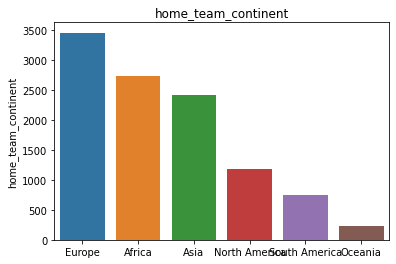

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


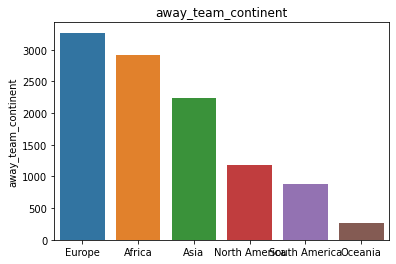

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


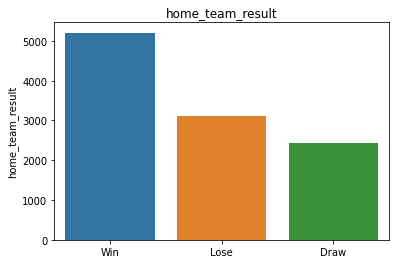

In [ ]:
for i in arr_cat.columns:
    sns.barplot(arr_cat[i].value_counts().index,arr_cat[i].value_counts()).set_title(i)
    plt.show()

In [ ]:
matches.tail()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0
23920,2022-06-14,Korea Republic,Egypt,Asia,Africa,29,32,1519,1500,4,...,No,Win,75.0,NaN,73.0,80.0,73.8,NaN,79.3,70.8


In [ ]:
home_win_vs_continent = pd.DataFrame()
cont = ['Africa','Europe','Asia','North America','South America','Oceania']

home_win_vs_continent['Europe'] = [0,0,0,0,0,0]
home_win_vs_continent['Africa'] = [0,0,0,0,0,0]
home_win_vs_continent['Asia'] = [0,0,0,0,0,0]
home_win_vs_continent['North America'] = [0,0,0,0,0,0]
home_win_vs_continent['South America'] = [0,0,0,0,0,0]
home_win_vs_continent['Oceania'] = [0,0,0,0,0,0]
home_win_vs_continent =  home_win_vs_continent.rename(index={0: "Europe", 1: "Africa", 2: "Asia",3: "North America", 4: "South America", 5: "Oceania"})

for i in cont:
  for j in cont:
    home_win_vs_continent.loc[i,j] = len(matches[(matches['home_team_continent'] == i) & (matches['away_team_continent'] == j) & (matches['home_team_result'] == "Win")]) / len(matches[(matches['home_team_continent'] == i) & (matches['away_team_continent'] == j)])


home_win_vs_continent.round(2)

print("Home wins vs nation from x continent")
print(home_win_vs_continent)

Home wins vs nation from x continent
                 Europe    Africa      Asia  North America  South America  \
Europe         0.452009  0.407767  0.612069       0.500000       0.371681   
Africa         0.300000  0.488777  0.500000       0.285714       0.111111   
Asia           0.422222  0.525714  0.511282       0.642857       0.296296   
North America  0.316667  0.500000  0.470588       0.513730       0.391089   
South America  0.553846  0.677419  0.730769       0.640719       0.508850   
Oceania        0.166667  0.666667  0.711538       0.500000       0.250000   

                Oceania  
Europe         0.629630  
Africa         0.333333  
Asia           0.369863  
North America  0.555556  
South America  0.625000  
Oceania        0.475177  


## 3) a. 
### - Maintenant, on veut s'occuper des attributs qui ne nous seront pas utiles. Les points FIFA que ce soit pour l'équipe à domicile ou à l'extérieur sont inutiles, car l'on a un attribut "rank" pour les deux équipes qui sont donné par ces points, c'est des données redondantes (Bloc[7]).
### - On a décidé de supprimer les attributs 'city', 'country' et 'neutral_location'. Le 3e argument n'est pas toujours véridique après vérification. Pour les deux premiers, bien que l'avantage de jouer à domicile existe vraiment dans le monde du sport notre ensemble contient des matchs de qualification aux compétitions (domicile-exterieur) mais aussi les matchs des compétitions officielles qui se jouent au même endroit. On perd alors le sens de jouer à domicile ou à l'extérieur.
### - Toujours grâce à nos connaissances, on s'occupe maintenant des matchs de compétitions régionales. Ces compétitions impliquent des équipes avec des joueurs juniors, locaux, féminins. Ceci peut falsifier notre ensemble de données, car un pays peut avoir une excellente sélection féminine, mais une sélection masculine très mal classé (le Canada jusqu'à tout récemment). On veut les compétitions pour les équipes seniors masculines.


In [ ]:
matches = matches.drop(['home_team_total_fifa_points','away_team_total_fifa_points','city','country','neutral_location'],axis=1)
matches.reset_index(inplace=True)

matches1 = matches[matches.tournament != "CECAFA Cup"]
matches2 = matches1[matches.tournament != "CFU Caribbean Cup"]
matches3 = matches2[matches.tournament != "CFU Caribbean Cup qualification"]
matches4 = matches3[matches.tournament != "Copa Confraternidad"]
matches5 = matches4[matches.tournament != "Copa del Pacífico"]
matches6 = matches5[matches.tournament != "Copa Paz del Chaco"]
matches7 = matches6[matches.tournament != "COSAFA Cup"]
matches8 = matches7[matches.tournament != "COSAFA Cup qualification"]
matches9 = matches8[matches.tournament != "AFF Championship"]
matches10 = matches9[matches.tournament != "AFF Championship qualification"]
matches11 = matches10[matches.tournament != "ABCS Tournament"]
matches12 = matches11[matches.tournament != "Afro-Asian Games"]
matches13 = matches12[matches.tournament != "Amílcar Cabral Cup"]
matches14 = matches13[matches.tournament !="Arab Cup qualification"]
matches15 = matches14[matches.tournament != "Baltic Cup"]
matches16 = matches15[matches.tournament != "Cup of Ancient Civilizations"]
matches17 = matches16[matches.tournament != "Cyprus International Tournament"]
matches18 = matches17[matches.tournament != "Dragon Cup"]
matches19 = matches18[matches.tournament != "Dunhill Cup"]
matches20 = matches19[matches.tournament != "Dynasty Cup"]
matches21 = matches20[matches.tournament != "EAFF Championship"]
matches22 = matches21[matches.tournament != "Intercontinental Cup"]
matches23 = matches22[matches.tournament != "King Hassan II Tournament"]
matches24 = matches23[matches.tournament != "King's Cup"]
matches25 = matches24[matches.tournament != "Kirin Challenge Cup"]
matches26 = matches25[matches.tournament != "Kirin Cup"]
matches27 = matches26[matches.tournament != "Korea Cup"]
matches28 = matches27[matches.tournament != "Lunar New Year Cup"]
matches29 = matches28[matches.tournament != "Mahinda Rajapaksa Cup"]
matches30 = matches29[matches.tournament != "Malta International Tournament"]
matches31 = matches30[matches.tournament != "Merdeka Tournament"]
matches32 = matches31[matches.tournament != "Millennium Cup"]
matches33 = matches32[matches.tournament != "Navruz Cup"]
matches34 = matches33[matches.tournament != "Nehru Cup"]
matches35 = matches34[matches.tournament != "Nile Basin Tournament"]
matches36 = matches35[matches.tournament != "Nordic Championship"]
matches37 = matches36[matches.tournament != "OSN Cup"]
matches38 = matches37[matches.tournament != "Pacific Games"]
matches39 = matches38[matches.tournament != "Pacific Mini Games"]
matches40 = matches39[matches.tournament != "Prime Minister's Cup"]
matches41 = matches40[matches.tournament != "SAFF Cup"]
matches42 = matches41[matches.tournament != "Simba Tournament"]
matches43 = matches42[matches.tournament != "SKN Football Festival"]
matches44 = matches43[matches.tournament != "South Pacific Games"]
matches45 = matches44[matches.tournament != "Superclásico de las Américas"]
matches46 = matches45[matches.tournament != "Three Nations Cup"]
matches47 = matches46[matches.tournament != "TIFOCO Tournament"]
matches48 = matches47[matches.tournament != "Tournoi de France"]
matches49 = matches48[matches.tournament != "UNCAF Cup"]
matches50 = matches49[matches.tournament != "UNIFFAC Cup"]
matches51 = matches50[matches.tournament != "United Arab Emirates Friendship Tournament"]
matches52 = matches51[matches.tournament != "USA Cup"]
matches53 = matches52[matches.tournament != "VFF Cup"]
matches54 = matches53[matches.tournament != 'WAFF Championship']
newmatch = matches54[matches.tournament != "Windward Islands Tournament"]

newmatch.reset_index(inplace=True)
newmatch = newmatch.drop(['index','level_0','shoot_out'],axis=1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_la

## 3) a. On renomme nos attributs
### - On a des attributs pour les gardiens, la défense, le milieu de terrain et l'attaque pour chaque équipe. On trouve qu'il serait plus facile pour notre modèle de faire une moyenne de ces notes que l'on va qualifier de la force d'une équipe (strength). Pour cela, on doit d'abord remplir les champs où l'on a des valeurs manquantes pour les quatre attributs, cela arrive pour les moins bonnes équipes dans le classement FIFA, on donne la moyenne (50/100) pour ces équipes.

### - On a décidé de supprimer l'attribut date, il n'a pas d'importance maintenant que l'on a dit pourquoi on a coupé notre ensemble de données en deux, à peu près (Bloc[6]) et on supprime 'tournament', cet attribut n'est plus utile, car l'on a supprimé les compétitions juniors, régionales et féminines précédemment.


### - Je ne sais pas comment il aurait été représenté sous forme d'attributs, mais une liste des joueurs blessés/suspendus, l'entraîneur en poste sont des attributs qui ont de la valeur. Est-ce que les joueurs suspendus/blessés sont pris en compte dans les attributs de forces de l'équipe. Certains entraîneurs sont aussi meilleurs que d'autres en voyant leur fiche gagnante. Les tirs cadrés aux filets dans un match donnent aussi une indication sur l'allure du match, qui domine ou non. Ce sont aussi des attributs que l'on aurait aimé voir.

In [ ]:
newmatch = newmatch.rename(columns={'home_team': 'team_A','away_team': 'team_B','home_team_fifa_rank': 'teamA_rank','away_team_fifa_rank': 'teamB_rank','home_team_score': 'teamA_score','away_team_score': 'teamB_score','home_team_result': 'teamA_result'})
newmatch = newmatch.rename(columns={'home_team_goalkeeper_score': 'teamA_GK_score','home_team_mean_defense_score': 'teamA_DEF_score','home_team_mean_midfield_score': 'teamA_MID_score','home_team_mean_offense_score':'teamA_OFF_score'})
newmatch = newmatch.rename(columns={'away_team_goalkeeper_score': 'teamB_GK_score','away_team_mean_defense_score': 'teamB_DEF_score','away_team_mean_midfield_score': 'teamB_MID_score','away_team_mean_offense_score':'teamB_OFF_score','home_team_continent':'teamA_continent','away_team_continent':'teamB_continent'})

newmatch['teamA_GK_score'] = newmatch['teamA_GK_score'].fillna(50)
newmatch['teamA_DEF_score'] = newmatch['teamA_DEF_score'].fillna(50)
newmatch['teamA_MID_score'] = newmatch['teamA_MID_score'].fillna(50)
newmatch['teamA_OFF_score'] = newmatch['teamA_OFF_score'].fillna(50)

newmatch['teamB_GK_score'] = newmatch['teamB_GK_score'].fillna(50)
newmatch['teamB_DEF_score'] = newmatch['teamB_DEF_score'].fillna(50)
newmatch['teamB_MID_score'] = newmatch['teamB_MID_score'].fillna(50)
newmatch['teamB_OFF_score'] = newmatch['teamB_OFF_score'].fillna(50)

newmatch['teamA_strength'] = 0
newmatch['teamB_strength'] = 0


for i in range(9816): 
  newmatch.at[i,'teamA_strength'] = (newmatch.at[i,'teamA_GK_score'] + newmatch.at[i,'teamA_DEF_score'] + newmatch.at[i,'teamA_MID_score'] + newmatch.at[i,'teamA_OFF_score']) / 4
  newmatch.at[i,'teamB_strength'] = (newmatch.at[i,'teamB_GK_score'] + newmatch.at[i,'teamB_DEF_score'] + newmatch.at[i,'teamB_MID_score'] + newmatch.at[i,'teamB_OFF_score']) / 4


newmatch = newmatch.drop(['team_A','team_B','teamA_GK_score','teamA_DEF_score','teamA_MID_score','teamA_OFF_score','teamB_GK_score','teamB_DEF_score','teamB_MID_score','teamB_OFF_score','date','tournament'],axis=1)
newmatch = newmatch[['teamA_continent','teamA_rank','teamA_strength','teamA_score', 'teamB_score','teamB_strength','teamB_rank','teamB_continent','teamA_result']]

newmatch.head(20)





,teamA_continent,teamA_rank,teamA_strength,teamA_score,teamB_score,teamB_strength,teamB_rank,teamB_continent,teamA_result
0,Africa,83,72,1,1,77,17,North America,Draw
1,South America,16,78,0,0,84,9,Europe,Draw
2,South America,7,82,1,0,69,21,Africa,Win
3,Europe,8,84,1,1,76,14,North America,Draw
4,Asia,47,72,2,0,77,13,Europe,Win
5,Africa,30,67,0,1,73,25,Europe,Lose
6,Europe,6,83,4,0,75,20,Oceania,Win
7,Europe,15,78,0,1,72,32,Africa,Lose
8,Europe,5,85,1,1,76,31,South America,Draw
9,Asia,45,63,1,0,78,19,Africa,Win


On a finalement décidé de supprimer les attributs team_A et team_B sachant que l'on connaît les notes des forces de l'équipe et l'issue de la rencontre. Aussi, après encodage, on aura des valeurs allant au-dessus de 200.

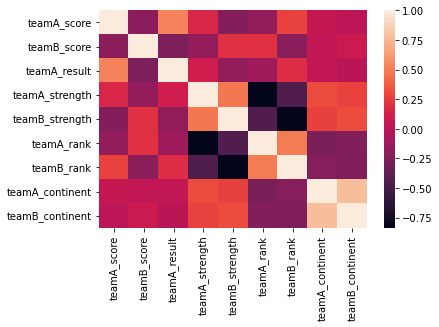

In [ ]:
matchEncoder = LabelEncoder()
newmatch['teamA_continent'] = matchEncoder.fit_transform(newmatch['teamA_continent'])
newmatch['teamB_continent'] = matchEncoder.fit_transform(newmatch['teamB_continent'])
newmatch['teamA_result'] = matchEncoder.fit_transform(newmatch['teamA_result'])

arr = newmatch[['teamA_score','teamB_score','teamA_result','teamA_strength','teamB_strength','teamA_rank','teamB_rank','teamA_continent','teamB_continent']]
sns.heatmap(arr.corr())

Notre nouvelle heatmap

# 4.a Voici notre nouvel ensemble après encodage (bloc [17])

In [ ]:
newmatch.head(20)
#teamA_result: Win = 2, Lose = 1 Draw = 0
#teamA_continent or teamB_continent: Africa = 0, Asia, = 1, Europe = 2, North America = 3, Oceania = 4, South America = 5

,teamA_continent,teamA_rank,teamA_strength,teamA_score,teamB_score,teamB_strength,teamB_rank,teamB_continent,teamA_result
0,0,83,72,1,1,77,17,3,0
1,5,16,78,0,0,84,9,2,0
2,5,7,82,1,0,69,21,0,2
3,2,8,84,1,1,76,14,3,0
4,1,47,72,2,0,77,13,2,2
5,0,30,67,0,1,73,25,2,1
6,2,6,83,4,0,75,20,4,2
7,2,15,78,0,1,72,32,0,1
8,2,5,85,1,1,76,31,5,0
9,1,45,63,1,0,78,19,0,2


### Petite vérification

In [ ]:
#Separe notre ensemble entre les variables reponses ("teamA_result")  et nos attributs feature variabes
X = newmatch.drop('teamA_result', axis = 1)
y = newmatch['teamA_result']

# train_test_split is a holdout technique for the cross validation  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
#Applying Standard scaling to get optimized result
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#  Petite vérification d'abord

In [ ]:
#Regression logistique
logReg = LogisticRegression()
logReg.fit(X_train, y_train)

#Predictions sur nos attributs de notre ensemble test
predLogi = logReg.predict(X_test)

#Comment les tests se sont passés
print("Evaluation for the logistic regression model")
print(classification_report(y_test,predLogi))

#Naive-Bayes
naive = GaussianNB()
naive.fit(X_train,y_train)

#Predictions sur nos attributs de notre ensemble test
predNaive = naive.predict(X_test)

#Comment les tests se sont passés
print("Evaluation for the Naive Bayes model")
print(classification_report(y_test,predNaive))

#Perceptron multi-couche
Percep = MLPClassifier()
Percep.fit(X_train,y_train)


#Predictions sur nos attributs de notre ensemble test
predPerc = Percep.predict(X_test)

#Comment les tests se sont passés
print("Evaluation for the multi-layer perceptron model")
print(classification_report(y_test,predPerc))

Evaluation for the logistic regression model
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       663
           1       1.00      0.99      0.99       880
           2       1.00      0.99      1.00      1403

    accuracy                           0.99      2946
   macro avg       0.99      0.99      0.99      2946
weighted avg       0.99      0.99      0.99      2946

Evaluation for the Naive Bayes model
              precision    recall  f1-score   support

           0       0.59      0.80      0.68       663
           1       0.96      0.75      0.84       880
           2       0.91      0.89      0.90      1403

    accuracy                           0.83      2946
   macro avg       0.82      0.81      0.81      2946
weighted avg       0.85      0.83      0.83      2946

Evaluation for the multi-layer perceptron model
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       663

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


## On voit que notre précision est bien trop élevée, c'est trop beau pour être vrai. En fait, on a oublié d'enlever le score des matchs. Bien sûr s'il on met nos scores les modèles pourront savoir immédiatement l'issue du match sans avoir besoin des attributs. On veut donc maintenant savoir l'issue du match à partir de la force des équipes et leurs rangs.

# (5.) Validation croisée
# (6.) Entrainement des modèles paramètre par défaut
# (7.) Test
# (8.) Evaluation

## Et ce, pour chaque modele

In [ ]:
#Separe notre ensemble entre les variables reponses ("teamA_result")  et nos attributs feature variabes
# For loop venant de https://www.askpython.com/python/examples/k-fold-cross-validation
Xx = newmatch.drop(['teamA_result','teamA_score','teamB_score'], axis = 1)
yy = newmatch['teamA_result']


k = 10
kf = KFold(n_splits=k)
logReg = LogisticRegression()
naive = GaussianNB()
Percep = MLPClassifier()

 
a=0
 
for train_index , test_index in kf.split(Xx):
    a=a+1
    X_train, X_test = Xx.iloc[train_index,:], Xx.iloc[test_index,:]
    y_train, y_test = yy[train_index], yy[test_index]
     
    logReg.fit(X_train,y_train)
    naive.fit(X_train,y_train)
    Percep.fit(X_train,y_train)

    logReg.fit(X_train, y_train)
    naive.fit(X_train, y_train)
    Percep.fit(X_train, y_train)
    
    predlog = logReg.predict(X_test)
    predNaive = naive.predict(X_test)
    predPercep = Percep.predict(X_test)

    print("For the fold:" + str(a))
    print(classification_report(y_test,predlog))
    print(classification_report(y_test,predNaive))
    print(classification_report(y_test,predPercep))
    print("=======================================")





/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For the fold:1
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       230
           1       0.53      0.57      0.55       292
           2       0.57      0.83      0.67       460

    accuracy                           0.56       982
   macro avg       0.37      0.46      0.41       982
weighted avg       0.42      0.56      0.48       982

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       230
           1       0.57      0.51      0.54       292
           2       0.56      0.87      0.68       460

    accuracy                           0.56       982
   macro avg       0.38      0.46      0.41       982
weighted avg       0.43      0.56      0.48       982

              precision    recall  f1-score   support

           0       0.24      0.10      0.15       230
           1       0.59      0.48      0.53       292
           2       0.57      0.80      0.67       460

    a

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logist

For the fold:2
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       227
           1       0.48      0.60      0.54       273
           2       0.62      0.83      0.71       482

    accuracy                           0.57       982
   macro avg       0.37      0.48      0.42       982
weighted avg       0.44      0.57      0.50       982

              precision    recall  f1-score   support

           0       0.50      0.01      0.02       227
           1       0.53      0.56      0.54       273
           2       0.61      0.87      0.72       482

    accuracy                           0.58       982
   macro avg       0.54      0.48      0.42       982
weighted avg       0.56      0.58      0.51       982

              precision    recall  f1-score   support

           0       0.29      0.14      0.19       227
           1       0.64      0.25      0.36       273
           2       0.58      0.91      0.71       482

    a

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logist

For the fold:3
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       237
           1       0.51      0.59      0.55       265
           2       0.60      0.84      0.70       480

    accuracy                           0.57       982
   macro avg       0.37      0.48      0.42       982
weighted avg       0.43      0.57      0.49       982

              precision    recall  f1-score   support

           0       0.50      0.00      0.01       237
           1       0.55      0.58      0.56       265
           2       0.60      0.87      0.71       480

    accuracy                           0.59       982
   macro avg       0.55      0.49      0.43       982
weighted avg       0.56      0.59      0.50       982

              precision    recall  f1-score   support

           0       0.37      0.09      0.15       237
           1       0.50      0.63      0.56       265
           2       0.63      0.78      0.70       480

    a

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logist

For the fold:4
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       239
           1       0.53      0.55      0.54       279
           2       0.58      0.86      0.69       464

    accuracy                           0.56       982
   macro avg       0.37      0.47      0.41       982
weighted avg       0.42      0.56      0.48       982

              precision    recall  f1-score   support

           0       0.50      0.01      0.02       239
           1       0.57      0.52      0.54       279
           2       0.57      0.89      0.70       464

    accuracy                           0.57       982
   macro avg       0.55      0.47      0.42       982
weighted avg       0.55      0.57      0.49       982

              precision    recall  f1-score   support

           0       0.50      0.01      0.02       239
           1       0.49      0.66      0.56       279
           2       0.60      0.78      0.68       464

    a

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logist

For the fold:5
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       203
           1       0.55      0.55      0.55       296
           2       0.62      0.87      0.72       483

    accuracy                           0.60       982
   macro avg       0.39      0.48      0.42       982
weighted avg       0.47      0.60      0.52       982

              precision    recall  f1-score   support

           0       0.27      0.01      0.03       203
           1       0.56      0.50      0.53       296
           2       0.60      0.87      0.71       483

    accuracy                           0.58       982
   macro avg       0.48      0.46      0.42       982
weighted avg       0.52      0.58      0.51       982

              precision    recall  f1-score   support

           0       0.23      0.07      0.11       203
           1       0.55      0.59      0.57       296
           2       0.65      0.80      0.72       483

    a

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For the fold:6
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       238
           1       0.52      0.54      0.53       259
           2       0.59      0.87      0.71       485

    accuracy                           0.58       982
   macro avg       0.37      0.47      0.41       982
weighted avg       0.43      0.58      0.49       982

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       238
           1       0.54      0.54      0.54       259
           2       0.59      0.87      0.70       485

    accuracy                           0.58       982
   macro avg       0.38      0.47      0.42       982
weighted avg       0.43      0.58      0.49       982

              precision    recall  f1-score   support

           0       0.37      0.19      0.25       238
           1       0.51      0.59      0.55       259
           2       0.65      0.75      0.70       485

    a

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

For the fold:7
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       253
           1       0.53      0.58      0.55       289
           2       0.56      0.84      0.67       440

    accuracy                           0.55       982
   macro avg       0.36      0.47      0.41       982
weighted avg       0.41      0.55      0.46       982

              precision    recall  f1-score   support

           0       0.67      0.02      0.03       253
           1       0.52      0.60      0.55       289
           2       0.57      0.83      0.67       440

    accuracy                           0.55       982
   macro avg       0.58      0.48      0.42       982
weighted avg       0.58      0.55      0.47       982

              precision    recall  f1-score   support

           0       0.30      0.44      0.35       253
           1       0.56      0.42      0.48       289
           2       0.64      0.57      0.60       440

    a

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logist

For the fold:8
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       199
           1       0.60      0.62      0.61       290
           2       0.62      0.86      0.73       492

    accuracy                           0.62       981
   macro avg       0.41      0.49      0.44       981
weighted avg       0.49      0.62      0.54       981

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       199
           1       0.63      0.57      0.60       290
           2       0.61      0.89      0.72       492

    accuracy                           0.61       981
   macro avg       0.41      0.49      0.44       981
weighted avg       0.49      0.61      0.54       981

              precision    recall  f1-score   support

           0       0.26      0.31      0.28       199
           1       0.68      0.50      0.57       290
           2       0.68      0.74      0.71       492

    a

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logist

For the fold:9
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       221
           1       0.62      0.56      0.59       289
           2       0.61      0.93      0.73       471

    accuracy                           0.61       981
   macro avg       0.41      0.50      0.44       981
weighted avg       0.48      0.61      0.53       981

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       221
           1       0.60      0.58      0.59       289
           2       0.61      0.90      0.73       471

    accuracy                           0.60       981
   macro avg       0.40      0.49      0.44       981
weighted avg       0.47      0.60      0.52       981

              precision    recall  f1-score   support

           0       0.30      0.12      0.17       221
           1       0.66      0.52      0.58       289
           2       0.63      0.89      0.73       471

    a

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logist

For the fold:10
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       211
           1       0.57      0.58      0.58       286
           2       0.62      0.88      0.73       484

    accuracy                           0.61       981
   macro avg       0.40      0.49      0.44       981
weighted avg       0.47      0.61      0.53       981

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       211
           1       0.57      0.57      0.57       286
           2       0.62      0.89      0.73       484

    accuracy                           0.60       981
   macro avg       0.40      0.48      0.43       981
weighted avg       0.47      0.60      0.53       981

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       211
           1       0.64      0.49      0.56       286
           2       0.60      0.94      0.73       484

    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## On a des résultat cohérents. 
## 9) Changeons les paramètres deux fois

In [ ]:
k = 10
kf1 = KFold(n_splits=k)
logReg = LogisticRegression(class_weight='balanced', random_state=None, max_iter=300, multi_class='auto', warm_start=False)
naive = ComplementNB()
Percep = MLPClassifier(hidden_layer_sizes=(15,15,15,1), max_iter=300, activation="tanh")

 
a=0
 
for train_index , test_index in kf1.split(Xx):
    a=a+1
    X_train, X_test = Xx.iloc[train_index,:], Xx.iloc[test_index,:]
    y_train, y_test = yy[train_index], yy[test_index]
     
    logReg.fit(X_train,y_train)
    naive.fit(X_train,y_train)
    Percep.fit(X_train,y_train)

    logReg.fit(X_train, y_train)
    naive.fit(X_train, y_train)
    Percep.fit(X_train, y_train)
    
    predlog = logReg.predict(X_test)
    predNaive = naive.predict(X_test)
    predPercep = Percep.predict(X_test)

    print("For the fold:" + str(a))
    print(classification_report(y_test,predlog))
    print(classification_report(y_test,predNaive))
    print(classification_report(y_test,predPercep))
    print("=======================================")




/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For the fold:1
              precision    recall  f1-score   support

           0       0.33      0.40      0.36       230
           1       0.52      0.57      0.54       292
           2       0.69      0.57      0.62       460

    accuracy                           0.53       982
   macro avg       0.51      0.51      0.51       982
weighted avg       0.55      0.53      0.54       982

              precision    recall  f1-score   support

           0       0.24      0.04      0.07       230
           1       0.46      0.69      0.55       292
           2       0.61      0.67      0.64       460

    accuracy                           0.53       982
   macro avg       0.44      0.47      0.42       982
weighted avg       0.48      0.53      0.48       982

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       230
           1       0.55      0.57      0.56       292
           2       0.57      0.84      0.68       460

    a

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logist

For the fold:2
              precision    recall  f1-score   support

           0       0.28      0.30      0.29       227
           1       0.49      0.60      0.54       273
           2       0.72      0.60      0.65       482

    accuracy                           0.53       982
   macro avg       0.49      0.50      0.49       982
weighted avg       0.55      0.53      0.54       982

              precision    recall  f1-score   support

           0       0.23      0.06      0.09       227
           1       0.42      0.71      0.53       273
           2       0.69      0.67      0.68       482

    accuracy                           0.54       982
   macro avg       0.45      0.48      0.43       982
weighted avg       0.51      0.54      0.50       982

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       227
           1       0.48      0.58      0.53       273
           2       0.61      0.83      0.71       482

    a

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logist

For the fold:3
              precision    recall  f1-score   support

           0       0.31      0.36      0.33       237
           1       0.50      0.60      0.54       265
           2       0.70      0.56      0.62       480

    accuracy                           0.52       982
   macro avg       0.50      0.51      0.50       982
weighted avg       0.55      0.52      0.53       982

              precision    recall  f1-score   support

           0       0.35      0.04      0.07       237
           1       0.42      0.74      0.54       265
           2       0.65      0.67      0.66       480

    accuracy                           0.54       982
   macro avg       0.47      0.48      0.42       982
weighted avg       0.52      0.54      0.49       982

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       237
           1       0.53      0.62      0.57       265
           2       0.60      0.85      0.71       480

    a

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logist

For the fold:4
              precision    recall  f1-score   support

           0       0.30      0.38      0.34       239
           1       0.53      0.54      0.53       279
           2       0.69      0.58      0.63       464

    accuracy                           0.52       982
   macro avg       0.51      0.50      0.50       982
weighted avg       0.55      0.52      0.53       982

              precision    recall  f1-score   support

           0       0.13      0.04      0.06       239
           1       0.46      0.70      0.56       279
           2       0.63      0.66      0.64       464

    accuracy                           0.52       982
   macro avg       0.41      0.47      0.42       982
weighted avg       0.46      0.52      0.48       982

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       239
           1       0.54      0.51      0.52       279
           2       0.56      0.86      0.68       464

    a

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logist

For the fold:5
              precision    recall  f1-score   support

           0       0.26      0.30      0.27       203
           1       0.54      0.57      0.56       296
           2       0.72      0.64      0.68       483

    accuracy                           0.55       982
   macro avg       0.50      0.50      0.50       982
weighted avg       0.57      0.55      0.56       982

              precision    recall  f1-score   support

           0       0.12      0.01      0.03       203
           1       0.48      0.72      0.57       296
           2       0.67      0.71      0.69       483

    accuracy                           0.57       982
   macro avg       0.42      0.48      0.43       982
weighted avg       0.50      0.57      0.52       982

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       203
           1       0.56      0.58      0.57       296
           2       0.62      0.86      0.72       483

    a

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logist

For the fold:6
              precision    recall  f1-score   support

           0       0.33      0.36      0.34       238
           1       0.53      0.59      0.56       259
           2       0.71      0.63      0.67       485

    accuracy                           0.56       982
   macro avg       0.52      0.53      0.52       982
weighted avg       0.57      0.56      0.56       982

              precision    recall  f1-score   support

           0       0.24      0.05      0.09       238
           1       0.45      0.69      0.54       259
           2       0.65      0.71      0.68       485

    accuracy                           0.54       982
   macro avg       0.45      0.48      0.44       982
weighted avg       0.50      0.54      0.50       982

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       238
           1       0.51      0.61      0.56       259
           2       0.61      0.85      0.71       485

    a

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logist

For the fold:7
              precision    recall  f1-score   support

           0       0.33      0.39      0.36       253
           1       0.50      0.59      0.54       289
           2       0.67      0.51      0.58       440

    accuracy                           0.50       982
   macro avg       0.50      0.50      0.49       982
weighted avg       0.53      0.50      0.51       982

              precision    recall  f1-score   support

           0       0.33      0.11      0.16       253
           1       0.44      0.75      0.55       289
           2       0.64      0.59      0.61       440

    accuracy                           0.51       982
   macro avg       0.47      0.48      0.44       982
weighted avg       0.50      0.51      0.48       982

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       253
           1       0.49      0.66      0.56       289
           2       0.59      0.79      0.67       440

    a

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logist

For the fold:8
              precision    recall  f1-score   support

           0       0.29      0.27      0.28       199
           1       0.58      0.67      0.62       290
           2       0.71      0.67      0.69       492

    accuracy                           0.59       981
   macro avg       0.53      0.54      0.53       981
weighted avg       0.59      0.59      0.59       981

              precision    recall  f1-score   support

           0       0.29      0.04      0.06       199
           1       0.54      0.77      0.64       290
           2       0.68      0.75      0.71       492

    accuracy                           0.61       981
   macro avg       0.50      0.52      0.47       981
weighted avg       0.56      0.61      0.56       981

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       199
           1       0.60      0.62      0.61       290
           2       0.63      0.87      0.73       492

    a

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logist

For the fold:9
              precision    recall  f1-score   support

           0       0.26      0.28      0.27       221
           1       0.61      0.59      0.60       289
           2       0.70      0.70      0.70       471

    accuracy                           0.57       981
   macro avg       0.52      0.52      0.52       981
weighted avg       0.58      0.57      0.57       981

              precision    recall  f1-score   support

           0       0.12      0.03      0.04       221
           1       0.53      0.75      0.62       289
           2       0.67      0.74      0.70       471

    accuracy                           0.58       981
   macro avg       0.44      0.51      0.46       981
weighted avg       0.50      0.58      0.53       981

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       221
           1       0.62      0.57      0.60       289
           2       0.60      0.92      0.73       471

    a

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logist

For the fold:10
              precision    recall  f1-score   support

           0       0.27      0.27      0.27       211
           1       0.55      0.65      0.59       286
           2       0.72      0.64      0.68       484

    accuracy                           0.56       981
   macro avg       0.51      0.52      0.51       981
weighted avg       0.57      0.56      0.56       981

              precision    recall  f1-score   support

           0       0.25      0.03      0.05       211
           1       0.50      0.74      0.60       286
           2       0.67      0.75      0.71       484

    accuracy                           0.59       981
   macro avg       0.48      0.51      0.45       981
weighted avg       0.53      0.59      0.54       981

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       211
           1       0.57      0.60      0.59       286
           2       0.62      0.87      0.73       484

    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:

kf2 = KFold(n_splits=k)
logReg = LogisticRegression(class_weight='balanced', random_state=None, max_iter=300, multi_class='auto', warm_start=False)
naive = ComplementNB()
Percep = MLPClassifier(hidden_layer_sizes=(15,15,15,15,1), max_iter=300, activation="tanh")

 
a=0
 
for train_index , test_index in kf2.split(Xx):
    a=a+1
    X_train, X_test = Xx.iloc[train_index,:], Xx.iloc[test_index,:]
    y_train, y_test = yy[train_index], yy[test_index]
     
    logReg.fit(X_train,y_train)
    naive.fit(X_train,y_train)
    Percep.fit(X_train,y_train)

    logReg.fit(X_train, y_train)
    naive.fit(X_train, y_train)
    Percep.fit(X_train, y_train)
    
    predlog = logReg.predict(X_test)
    predNaive = naive.predict(X_test)
    predPercep = Percep.predict(X_test)

    print("For the fold:" + str(a))
    print(classification_report(y_test,predlog))
    print(classification_report(y_test,predNaive))
    print(classification_report(y_test,predPercep))
    print("=======================================")




/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For the fold:1
              precision    recall  f1-score   support

           0       0.33      0.40      0.36       230
           1       0.52      0.57      0.54       292
           2       0.69      0.57      0.62       460

    accuracy                           0.53       982
   macro avg       0.51      0.51      0.51       982
weighted avg       0.55      0.53      0.54       982

              precision    recall  f1-score   support

           0       0.24      0.04      0.07       230
           1       0.46      0.69      0.55       292
           2       0.61      0.67      0.64       460

    accuracy                           0.53       982
   macro avg       0.44      0.47      0.42       982
weighted avg       0.48      0.53      0.48       982

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       230
           1       0.51      0.61      0.56       292
           2       0.58      0.81      0.68       460

    a

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logist

For the fold:2
              precision    recall  f1-score   support

           0       0.28      0.30      0.29       227
           1       0.49      0.60      0.54       273
           2       0.72      0.60      0.65       482

    accuracy                           0.53       982
   macro avg       0.49      0.50      0.49       982
weighted avg       0.55      0.53      0.54       982

              precision    recall  f1-score   support

           0       0.23      0.06      0.09       227
           1       0.42      0.71      0.53       273
           2       0.69      0.67      0.68       482

    accuracy                           0.54       982
   macro avg       0.45      0.48      0.43       982
weighted avg       0.51      0.54      0.50       982

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       227
           1       0.53      0.50      0.52       273
           2       0.59      0.90      0.71       482

    a

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logist

For the fold:3
              precision    recall  f1-score   support

           0       0.31      0.36      0.33       237
           1       0.50      0.60      0.54       265
           2       0.70      0.56      0.62       480

    accuracy                           0.52       982
   macro avg       0.50      0.51      0.50       982
weighted avg       0.55      0.52      0.53       982

              precision    recall  f1-score   support

           0       0.35      0.04      0.07       237
           1       0.42      0.74      0.54       265
           2       0.65      0.67      0.66       480

    accuracy                           0.54       982
   macro avg       0.47      0.48      0.42       982
weighted avg       0.52      0.54      0.49       982

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       237
           1       0.53      0.59      0.56       265
           2       0.60      0.85      0.70       480

    a

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logist

For the fold:4
              precision    recall  f1-score   support

           0       0.30      0.38      0.34       239
           1       0.53      0.54      0.53       279
           2       0.69      0.58      0.63       464

    accuracy                           0.52       982
   macro avg       0.51      0.50      0.50       982
weighted avg       0.55      0.52      0.53       982

              precision    recall  f1-score   support

           0       0.13      0.04      0.06       239
           1       0.46      0.70      0.56       279
           2       0.63      0.66      0.64       464

    accuracy                           0.52       982
   macro avg       0.41      0.47      0.42       982
weighted avg       0.46      0.52      0.48       982

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       239
           1       0.60      0.41      0.48       279
           2       0.54      0.93      0.68       464

    a

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logist

For the fold:5
              precision    recall  f1-score   support

           0       0.26      0.30      0.27       203
           1       0.54      0.57      0.56       296
           2       0.72      0.64      0.68       483

    accuracy                           0.55       982
   macro avg       0.50      0.50      0.50       982
weighted avg       0.57      0.55      0.56       982

              precision    recall  f1-score   support

           0       0.12      0.01      0.03       203
           1       0.48      0.72      0.57       296
           2       0.67      0.71      0.69       483

    accuracy                           0.57       982
   macro avg       0.42      0.48      0.43       982
weighted avg       0.50      0.57      0.52       982

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       203
           1       0.56      0.58      0.57       296
           2       0.62      0.86      0.72       483

    a

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logist

For the fold:6
              precision    recall  f1-score   support

           0       0.33      0.36      0.34       238
           1       0.53      0.59      0.56       259
           2       0.71      0.63      0.67       485

    accuracy                           0.56       982
   macro avg       0.52      0.53      0.52       982
weighted avg       0.57      0.56      0.56       982

              precision    recall  f1-score   support

           0       0.24      0.05      0.09       238
           1       0.45      0.69      0.54       259
           2       0.65      0.71      0.68       485

    accuracy                           0.54       982
   macro avg       0.45      0.48      0.44       982
weighted avg       0.50      0.54      0.50       982

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       238
           1       0.54      0.56      0.55       259
           2       0.60      0.88      0.71       485

    a

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logist

For the fold:7
              precision    recall  f1-score   support

           0       0.33      0.39      0.36       253
           1       0.50      0.59      0.54       289
           2       0.67      0.51      0.58       440

    accuracy                           0.50       982
   macro avg       0.50      0.50      0.49       982
weighted avg       0.53      0.50      0.51       982

              precision    recall  f1-score   support

           0       0.33      0.11      0.16       253
           1       0.44      0.75      0.55       289
           2       0.64      0.59      0.61       440

    accuracy                           0.51       982
   macro avg       0.47      0.48      0.44       982
weighted avg       0.50      0.51      0.48       982

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       253
           1       0.52      0.62      0.57       289
           2       0.57      0.82      0.67       440

    a

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logist

For the fold:8
              precision    recall  f1-score   support

           0       0.29      0.27      0.28       199
           1       0.58      0.67      0.62       290
           2       0.71      0.67      0.69       492

    accuracy                           0.59       981
   macro avg       0.53      0.54      0.53       981
weighted avg       0.59      0.59      0.59       981

              precision    recall  f1-score   support

           0       0.29      0.04      0.06       199
           1       0.54      0.77      0.64       290
           2       0.68      0.75      0.71       492

    accuracy                           0.61       981
   macro avg       0.50      0.52      0.47       981
weighted avg       0.56      0.61      0.56       981

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       199
           1       0.60      0.61      0.60       290
           2       0.62      0.86      0.72       492

    a

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logist

For the fold:9
              precision    recall  f1-score   support

           0       0.26      0.28      0.27       221
           1       0.61      0.59      0.60       289
           2       0.70      0.70      0.70       471

    accuracy                           0.57       981
   macro avg       0.52      0.52      0.52       981
weighted avg       0.58      0.57      0.57       981

              precision    recall  f1-score   support

           0       0.12      0.03      0.04       221
           1       0.53      0.75      0.62       289
           2       0.67      0.74      0.70       471

    accuracy                           0.58       981
   macro avg       0.44      0.51      0.46       981
weighted avg       0.50      0.58      0.53       981

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       221
           1       0.61      0.56      0.58       289
           2       0.61      0.92      0.73       471

    a

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logist

For the fold:10
              precision    recall  f1-score   support

           0       0.27      0.27      0.27       211
           1       0.55      0.65      0.59       286
           2       0.72      0.64      0.68       484

    accuracy                           0.56       981
   macro avg       0.51      0.52      0.51       981
weighted avg       0.57      0.56      0.56       981

              precision    recall  f1-score   support

           0       0.25      0.03      0.05       211
           1       0.50      0.74      0.60       286
           2       0.67      0.75      0.71       484

    accuracy                           0.59       981
   macro avg       0.48      0.51      0.45       981
weighted avg       0.53      0.59      0.54       981

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       211
           1       0.60      0.56      0.58       286
           2       0.61      0.89      0.72       484

    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 10.a) Présentation et Analyse des résultats

### On utilise 10 folds pour nos 3 modèles et ce à 3 reprises. 
Pour la première série avec les paramètres par défaut:
- Précision Régression logistique: entre 0.56 et 0.62
- Pécision Naive Bayes: entre 0.56 et 0.62
- Précision Perceptron: entre 0.59 et 0.7 (Les plus grandes irrégularité entre chaque fold)

- Rappel Régression logistique: entre 0.83 et 0.93
- Rappel Naive-Bayes: entre 0.87 et 0.9
- Rappel Perceptron: entre 0.63 et 0.9


=========================================================================================

Pour la deuxième série:
(class-weight = 'balanced' reduire l'impact de classe dominantes)

(multi_class = 'auto' parce qu'on a un problème binaire)

(warm_start = True utilise la solution d'un appel précédent comme initialiseur)

(max_iter Nombre maximal d'itérations nécessaires pour que les solveurs convergent.)

(hidden_layer_sizes spécifie le nombres de couches cachées et le nombre de noeuds dans ces couches)

(activation fonction utilisée (tanh,relu etc...))


- Précision Régression logistique: entre 0.69 et 0.72
- Pécision Naive Bayes: entre 0.61 et 0.69
- Précision Perceptron: entre 0.57 et 0.63 

- Rappel Régression logistique: entre 0.56 et 0.7
- Rappel Naive-Bayes: entre 0.66 et 0.75
- Rappel Perceptron: entre 0.85 et 0.92

=========================================================================================

Pour la troisième série avec des paramètres différents de la 2eme série:
- Précision Régression logistique: entre 0.69 et 0.72
- Pécision Naive Bayes: entre 0.61 et 0.69
- Précision Perceptron: entre 0.56 et 0.62 

- Rappel Régression logistique: entre 0.51 et 0.72
- Rappel Naive-Bayes: entre 0.59 et 0.75 
- Rappel Perceptron: entre 0.82 et 0.89


Remarques: 
- On voit que le rappel augmente pour le modèle perceptron et diminue pour la régression.
logistique et les modèles Naive-Bayes. Et inversement pour la précision qui est
meilleure pour la 2e et 3e série pour les modèles de Régression logistique et Naive-Bayes
contrairement au modèle perceptron.
- On l'a enlevé de ce notebook mais la précision augmente avec le nombre de folds aussi.


On a une précision qui semble stagner entre 60 % et 70 %. Et un rappel assez haut. Dans notre cas, c'est la précision qui compte et non le rappel.








In [ ]:
newmatch.tail(20)

,teamA_continent,teamA_rank,teamA_strength,teamA_score,teamB_score,teamB_strength,teamB_rank,teamB_continent,teamA_result
9797,1,89,50,1,0,50,134,1,2
9798,1,154,50,4,1,50,188,1,2
9799,1,152,50,2,6,50,158,1,1
9800,1,95,50,0,0,50,114,1,0
9801,3,64,73,1,1,79,9,3,0
9802,3,74,52,1,1,76,15,3,0
9803,3,90,57,6,0,50,174,5,2
9804,2,5,85,0,4,76,40,2,1
9805,2,12,86,5,2,85,6,2,2
9806,2,10,83,3,2,75,18,2,2


In [ ]:
logR = predlog[-20:]
nb = predNaive[-20:]
per = predPercep[-20:]

print(logR)
print(nb)
print(per)
a = yy.tail(20)
print(a)


LogTP = 0
LogTN = 0
LogFP = 0
LogFN = 0
for i in range(len(a)):
  if a.iloc[i]==2:
    if logR[i]==a.iloc[i]:
      LogTP = LogTP + 1
    else:
      LogFN = LogFN + 1
  if a.iloc[i]==1:
    if logR[i]==a.iloc[i] or logR[i]==0:
      LogTN = LogTN + 1
    else:
      LogFP = LogFP + 1
  if a.iloc[i]==0:
    if logR[i]==a.iloc[i] or logR[i]==1:
      LogTN = LogTN + 1
    else:
      LogFP = LogFP + 1



nbTP = 0
nbTN = 0
nbFP = 0
nbFN = 0
for i in range(len(a)):
  if a.iloc[i]==2:
    if nb[i]==a.iloc[i]:
      nbTP = nbTP + 1
    else:
      nbFN = nbFN + 1
  if a.iloc[i]==1:
    if nb[i]==a.iloc[i] or nb[i]==0:
      nbTN = nbTN + 1
    else:
      nbFP = nbFP + 1
  if a.iloc[i]==0:
    if nb[i]==a.iloc[i] or nb[i]==1:
      nbTN = nbTN + 1
    else:
      nbFP = nbFP + 1



perTP = 0
perTN = 0
perFP = 0
perFN = 0
for i in range(len(a)):
  if a.iloc[i]==2:
    if per[i]==a.iloc[i]:
      perTP = perTP + 1
    else:
      perFN = perFN + 1
  if a.iloc[i]==1:
    if per[i]==a.iloc[i] or per[i]==0:
      perTN = perTN + 1
    else:
      perFP = perFP + 1
  if a.iloc[i]==0:
    if per[i]==a.iloc[i] or per[i]==1:
      perTN = perTN + 1
    else:
      perFP = perFP + 1


print("Pour la régression logistique")
print("-----------------------------")
print("True positives: " + str(LogTP))
print("False positives: " + str(LogFP))
print("True negatives: " + str(LogTN))
print("False negatives: " + str(LogFN))
print("==============================")
print("Pour Naive-Bayes")
print("-----------------------------")
print("True positives: " + str(nbTP))
print("False positives: " + str(nbFP))
print("True negatives: " + str(nbTN))
print("False negatives: " + str(nbFN))
print("==============================")
print("Pour Perceptron")
print("-----------------------------")
print("True positives: " + str(perTP))
print("False positives: " + str(perFP))
print("True negatives: " + str(perTN))
print("False negatives: " + str(perFN))
print("==============================")

[2 2 2 0 1 1 2 2 0 0 1 1 2 0 2 2 2 1 1 0]
[2 2 2 2 1 1 2 2 1 0 1 1 2 1 2 2 2 1 1 2]
[2 2 2 2 1 1 2 2 2 2 1 1 2 2 2 2 2 1 1 1]
9797    2
9798    2
9799    1
9800    0
9801    0
9802    0
9803    2
9804    1
9805    2
9806    2
9807    1
9808    1
9809    0
9810    2
9811    1
9812    0
9813    2
9814    2
9815    1
9816    2
Name: teamA_result, dtype: int64
Pour la régression logistique
-----------------------------
True positives: 4
False positives: 5
True negatives: 6
False negatives: 5
Pour Naive-Bayes
-----------------------------
True positives: 5
False positives: 6
True negatives: 5
False negatives: 4
Pour Perceptron
-----------------------------
True positives: 7
False positives: 6
True negatives: 5
False negatives: 2


## 10 b.)
En comparant les modèles et les dernières lignes de notre ensemble de données (colonne teamA_result) on remarque généralement, que les faux positifs/négatifs et différences entre modèles surviennent quand le rang mondial et notes de forces des deux équipes sont très similaires les uns des autres ce qui est normal. Il est plus facile de prédire l'issue d'un match quand une équipe est bien meilleure qu'une autre.

Et les vrai positif/négatif surviennent quand il y a un écart significatif entre les notes de force des deux équipes et/ou les rangs de ces deux mêmes équipes.


Ceci est plus clair:

####Prediction Régression logistique
####2 2 2 0 1 1 2 2 0 0 1 1 2 0 2 2 2 1 1 0
####Vrai valeurs
####2 2 1 0 0 0 2 1 2 2 1 1 0 2 1 0 2 2 1 2

================================

####Faux Positifs (leurs positions dans le tableau et on regarde le tableau du dessus)
##Voici le format: 
##strenghts (teamA_strength/teamB_strength)(teamA_rank/teamB_rank)

####2- (strenghts 50/50) (rank 152/158)
####7- (strenghts 85/76) (rank 5/40)
####12-(strenghts 77/74) (rank 27/47)
####14-(strenghts 74/71) (rank 48/71))
####15-(strenghts 64/50) (rank 94/124))

================================

####Faux Négatifs (leurs positions)


####A/B 
####8- (strenghts 86/85) (rank 12/6)
####9- (strenghts 83/75) (rank 152/158)
####13- (strenghts 76/74) (rank 10/18)
####17- (strenghts 53/50) (rank 180/153))
####19- (strenghts 0/0) (rank 29/32)) (Valeur manquantes pourquoi strength=0 après traitement?)

================================

####Vrai Positifs (leurs positions)


####A/B 
####0- (strenghts 50/50) (rank 89/134)
####1- (strenghts 50/50) (rank 154/188)
####6-(strenghts 57/50) (rank 90/174)
####16-(strenghts 78/55) (rank 43/134))

================================

####Vrai Negatifs (leurs positions)


####A/B
####3- (strenghts 50/50) (rank 95/114)
####4- (strenghts 73/79) (rank 64/9)
####5- (strenghts 52/76) (rank 74/15)
####10- (strenghts 80/85) (rank 26/2))
####11- (strenghts 55/76) (rank 92/39))
####18- (strenghts 50/53) (rank 192/135))
